# Project Overview 

The central theme of this endeavor revolves around the illustrious English Premier League (EPL), a soccer spectacle that commands a staggering 12 million viewers per game, prompting a collective inclination among prominent EPL teams to embrace the realm of Analytics and Artificial Intelligence (AI). Amidst this backdrop, the surge of machine learning and AI in the domain of sports analytics gains prominence, establishing a compelling context. Within this milieu, the sports entertainment sector and its invested stakeholders strategically wield sophisticated algorithms, notably Linear Regression, to amplify financial gains and strategically mitigate business risks associated with player selection and wagering. In this project, we wish to use Linear Regression to predict the scores of EPL soccer players. With the business implications cleared. Let's get into the project's technical details.

### Important Libraries
- Pandas: pandas is a fast, powerful, flexible, and easy-to-use open-source data analysis and manipulation tool built on top of the Python programming language. Refer to [documentation](https://pandas.pydata.org/ ) for more information.
- NumPy: The fundamental package for scientific computing with Python. Fast and versatile, the NumPy vectorization, indexing, and broadcasting concepts are the de-facto standards of array computing today. NumPy offers comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more. Refer to [documentation](https://numpy.org/ ) for more information. pandas and NumPy are together used for most of the data analysis and manipulation in Python.
- Matplotlib: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Refer to [documentation](https://matplotlib.org/) for more information.
- Seaborn: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Refer to [documentation](https://seaborn.pydata.org/ ) for more information.
- scikit-learn: Simple and efficient tools for predictive data analysis accessible to everybody and reusable in various contexts. It is built on NumPy, SciPy, and matplotlib to support machine learning in Python. Refer to [documentation](https://scikit-learn.org/stable/ ) for more information.
- statsmodels: statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests and statistical data exploration. Refer to [documentation](https://www.statsmodels.org/stable/index.html ) for more information.
- SciPy: SciPy provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics, and many other classes of problems. Refer to [documentation](https://scipy.org/ ) for more information.

In [33]:
#import required packages

import pandas as pd #for handling and analyzing data in structured format.
import numpy as np  #for numerical and mathematical operations on arrays.
import matplotlib.pyplot as plt #Library for creating visualizations and plots.
from sklearn.model_selection import train_test_split #splitting data into training and testing sets
import statsmodels.api as sm #Library for statistical models and tests.
import seaborn as sns #Library for statistical data visualization.
from scipy import stats #Module for statistical functions and tests.
import scipy #Library for scientific computing and advanced mathematics.
from matplotlib.pyplot import figure #Function for customizing plot figure properties.

In [4]:
# Load the data as a data frame by using URL
soccer_data_url="EPL_Soccer_MLR_LR.csv"
df = pd.read_csv(soccer_data_url)

In [5]:
#view top 3 entries from the soccer data
df.head(3)

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88


## Data Dictionary
- PlayerName : Player Name
- Club : Club of the player
- DistanceCovered(InKms): Average Kms distance covered by the player in each game
- Goals: Average Goals per match
- MinutestoGoalRatio: Minutes
- ShotsPerGame: Average shots taken per game
- AgentCharges: Agent Fees in h
- BMI: Body-Mass index
- Cost: Cost of each player in hundread thousand dollars
- PreviousClubCost: Previous club cost in hundread thousand dollars
- Height: Height of player in cm
- Weight: Weight of player in kg
- Score: Average score per match

In [6]:
df.columns

Index(['PlayerName', 'Club', 'DistanceCovered(InKms)', 'Goals',
       'MinutestoGoalRatio', 'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost', 'Height', 'Weight', 'Score'],
      dtype='object')

The dataframe.info() method prints information about the DataFrame, including the index dtype and columns, non-null values, and memory usage.

It can be used to get basic info, look for missing values, and get a sense of each variable's format.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


Here are total 202 rows and 13 columns in EPL Soccer Dataset.
Observe that there are no null values in the dataset.
Out of 13 columns 10 are float type and 1 is integer type The remaining 2 have object dtype.

In [28]:
# descriptive statistics
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


In [9]:
df.corr()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


The correlation between DistanceCovered(InKms) and the target variable score  −0.49  indicates negative correlation. The variable cost is related to the target variable with correlation coefficient  0.96  which indicates strong positive relationship.

## Relationship between Cost and Score
Score and Cost exhibit a substantial correlation of 96%, signifying the significance of their association. Notably, Cost emerges as a viable candidate for the role of predictor variable in a simple linear regression model, primarily due to the anticipation of a linear relationship between the two variables, as evidenced by their scatter plot. In order to provide a tangible illustration of this relationship, we shall proceed to construct a scatter plot depicting the interplay between Cost and Score.

Text(0.5, 1.0, 'Scatter plot between Cost and Score')

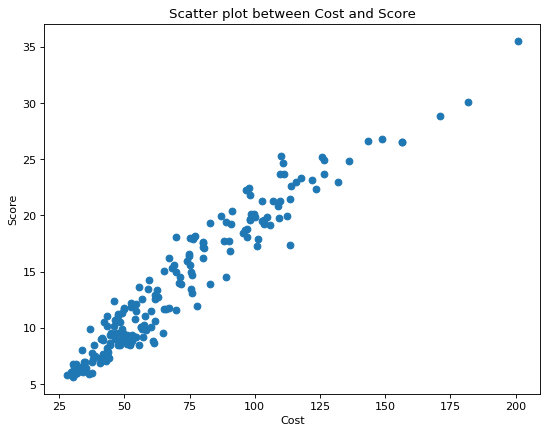

In [29]:
#Let's plot cost vs. score
figure(figsize=(8, 6), dpi=80)
plt.scatter(df['Cost'], df['Score'])

# label
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Scatter plot between Cost and Score")

# Strong linear association between cost and score, maybe some concern with model after a cost of 125 or so!

The correlation between Cost and Score is easily visible.

## Train - Test Split
The dataset is partitioned into two distinct sets: training and testing. This division is facilitated through the utilization of a train-test split methodology. The training dataset assumes a pivotal role in model training, while the resultant model's predictive capabilities are assessed on the test dataset. This pivotal evaluation gauges the model's efficacy when confronted with previously unseen data, shedding light on potential issues such as overfitting or underfitting.

In [30]:
# Assign x, y then do training testing split
x=df['Cost']
y=df['Score']

# Splitting with 75% training, 25% testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)

## Linear Regression

Transitioning to our specific scenario, we are poised to construct a model that encapsulates the interplay between Cost and Scores through the utilization of the Ordinary Least Squares method, harnessed from the expansive repertoire of the statsmodels library.

In [32]:
#statsmodels approach to regression
# fit the model
lr = sm.OLS(y_train, x_train).fit()

# Printing the parameters
lr.params
lr.summary()

#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1976.
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           6.91e-88
Time:                        21:31:19   Log-Likelihood:                -293.23
No. Observations:                 151   AIC:                             590.5
Df Residuals:                     149   BIC:                             596.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9472      0.325      2.916      0.0

What would happen if we do not include constant while building the Linear Regression model?

const    0.947185
Cost     0.182083
dtype: float64


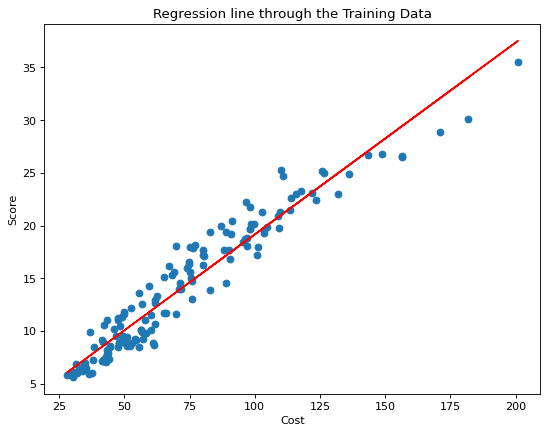

In [13]:
#Extract the B0, B1
print(lr.params)
b0=lr.params[0]
b1=lr.params[1]

#Plot the fitted line on training data
figure(figsize=(8, 6), dpi=80)
plt.scatter(x_train, y_train)

plt.plot(x_train, b0+ b1*x_train, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Training Data")

plt.show()

In this plot, we are extracting the values of the intercept  𝛽0  and coefficient/slope  𝛽1  and plotting the regression line over the scatter plot of the Cost and Score of training data.

The regression line has a good fitting, it probably deviates a little after a cost of 125 or so, let's see if we can improve it in the later sections when we diagnose and remedy but first let's see how our model performs on the test data

## Prediction on Test Data

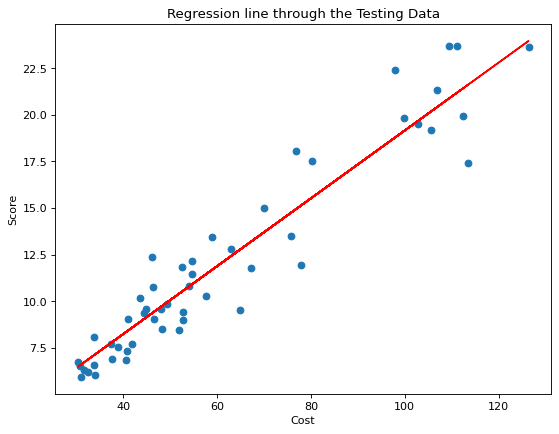

In [14]:
#Plot the fitted line on test data
x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)


# scatter plot on test data
figure(figsize=(8, 6), dpi=80)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Testing Data")

plt.show()

Here we can see that the model has built a good regression fit as it is passing through the middle of all the points to get the minimum error.

## Diagnostics and Remedies

As we gleaned from the preceding section, Linear Regression adheres to specific assumptions. The segment titled "Diagnostics and Remedies" is an inquiry into the alignment of data with these assumptions, gauging the suitability of Linear Regression in capturing patterns, and encompassing procedures for evaluating model performance. This section delves into the parameters that signal the inadequacy of Linear Regression as a model: 

1. Non-Linearity: A foremost consideration is the presence of non-linearity in the data. While the data may appear linear initially, instances of non-linearity, where a parabolic relationship may be more fitting than a straight line, must be scrutinized.
2. Heteroscedasticity: The occurrence of non-constant variance, where variability differs between distinct regions, warrants attention.
3. Independence: Deviation from the assumption of independent and identically distributed errors demands assessment. 
4. Outliers: The influence of outliers on the model's integrity is significant. Outliers have the capacity to dramatically alter the trajectory of a regression line, especially if they are positioned distantly from the bulk of the data. 
5. Missing Features: The absence of predictor variables, while not critical in simple linear regression, can result in the exclusion of potentially valuable variables.  To address these aspects, we embark on Residual Analysis. 

This technique delves into the study of residuals—errors derived from subtracting the predicted value from the actual value of the dependent variable. 

- Residual analysis serves as a diagnostic tool, guiding enhancements to model performance.
- Residual plots against predictors aid in detecting deviations from linearity. If a scatter plot showcases a departure from linearity, reevaluation or model modifications are warranted.
- Variance evaluation can also be conducted through these plots; a 'megaphone' scatter plot shape signals non-constant variance. Transformations or weighted least squares can counteract heteroscedasticity.
- Sequential plots or residuals over time can unveil cyclical patterns or trends, indicating scenarios where linear regression proves advantageous or less appropriate.  
- Box plots of residuals offer insights; normalcy is indicated by a symmetrical, centered plot. Departures from normalcy can also be gauged through normal probability plots.  Lastly, outlier scrutiny is essential. 

Outliers shouldn't be dismissed outright, unless they are undoubtedly erroneous data points. Their potential impact on the model should be judiciously assessed before any action is taken.

In [31]:
#DIAGNOSTICS

#CHECKLIST:
# NON-LINEARITY
# NON-CONSTANT VARIANCE
# DEVIATIONS FROM NORMALITY
# ERRORS NOT IID
# OUTLIERS
# MISSING PREDICTORS

In [16]:
#Build predictions on training data
predictions_y = lr.predict(x_train_with_intercept)

#Find residuals
r_i = (y_train - predictions_y)

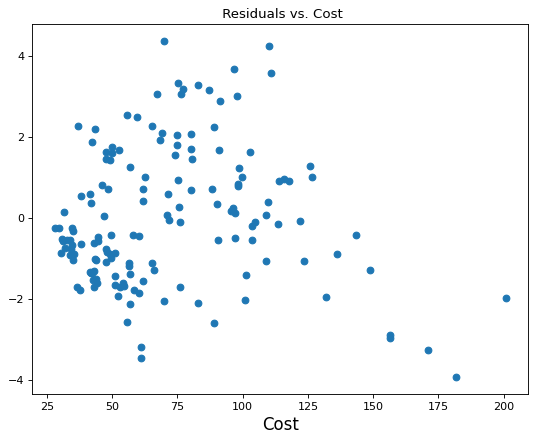

In [17]:

#Residuals vs. predictor in training data
figure(figsize=(8, 6), dpi=80)
plt.title(' Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_train, r_i)
plt.show()

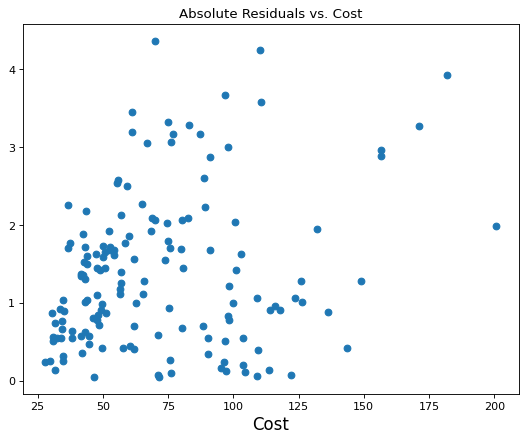

In [18]:
#Absolute residuals against predictor
abs_r_i = np.abs(y_train - predictions_y)
figure(figsize=(8, 6), dpi=80)
plt.title('Absolute Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_train, abs_r_i)
plt.show()

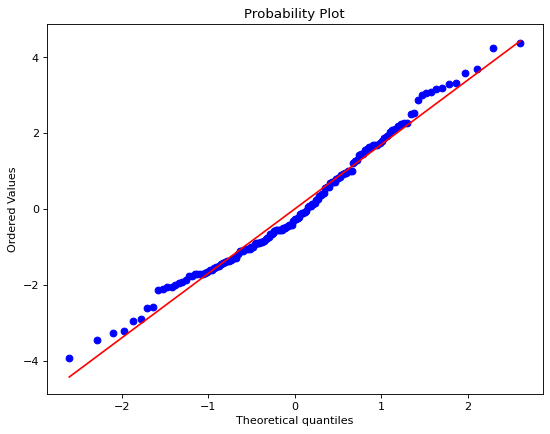

<Figure size 640x480 with 0 Axes>

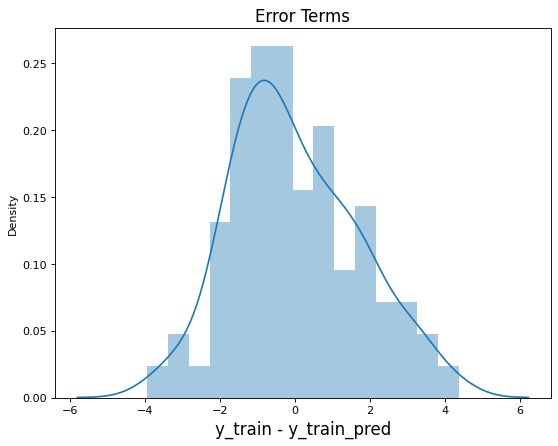

In [24]:
#Normality plot
figure(figsize=(8, 6), dpi=80)
scipy.stats.probplot(r_i,plot=plt)

#Tails might be a little heavy, but overall no clear reason to reject normality expectations
# Evaluate normality through histogram of residuals
# Plotting the histogram using the residual values
fig = plt.figure()
figure(figsize=(8, 6), dpi=80)
sns.distplot(r_i, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

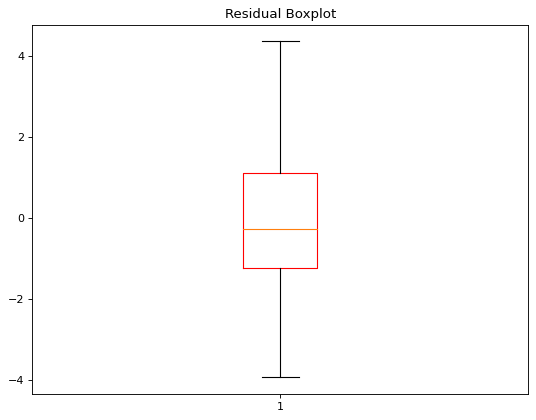

In [25]:
#Boxplot for outliers
# plot
figure(figsize=(8, 6), dpi=80)
plt.boxplot(r_i, boxprops=dict(color='red'))
plt.title('Residual Boxplot');

## Conclusion

With a Simple Linear Regression problem statement, we learned the fundamentals of Linear Regression by predicting the scores of soccer players based on their cost.